In [1]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt


In [2]:
#importing data

df = pd.read_csv(os.path.expanduser('data/DataSample.csv'))
df

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730
...,...,...,...,...,...,...,...
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560
22021,5614888,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260


In [3]:
df2 = pd.read_csv(os.path.expanduser('data/POIList.csv'))
df2

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
1,POI2,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22025 entries, 0 to 22024
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _ID        22025 non-null  int64  
 1    TimeSt    22025 non-null  object 
 2   Country    22025 non-null  object 
 3   Province   22025 non-null  object 
 4   City       22025 non-null  object 
 5   Latitude   22025 non-null  float64
 6   Longitude  22025 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ MB


### 1. Cleanup

Records that have identical geoinfo (Latitude and Longitude) and timest as suspicious. Please clean up the sample dataset by filtering out 
those questionable request records.

In [5]:
#cleaning data

sub_lst = [' TimeSt', 'Latitude', 'Longitude']
df_cleaned = (df[~df.duplicated(sub_lst)])    
df_cleaned

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730
...,...,...,...,...,...,...,...
22019,5614760,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260


In [6]:
sub_lst2 = [' Latitude', 'Longitude']
df2_cleaned = (df2[~df2.duplicated(sub_lst2)])    
df2_cleaned

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


### 2. Label
Assign each request (from data/DataSample.csv) to the closest (i.e., minimum distance) POI (from data/POIList.csv).

In [7]:
df_Data = df_cleaned.copy()
df_POI = df2_cleaned.copy()


#claculating distance
def Distance(df, Longitude, Latitude):
    zip_lst = zip(Longitude, Latitude)
    distances = []
    for (x, y) in zip_lst:
        dist = math.sqrt(x**2 + y**2)  
        distances.append(dist)
    df['Distances'] = distances
    return df



df_POILat = df_POI[' Latitude']
df_POILong = df_POI['Longitude']

df_POI = (Distance(df_POI, df_POILong, df_POILat))



df_DataLat = df_Data['Latitude']
df_DataLong = df_Data['Longitude']

df_Data = Distance(df_Data, df_DataLong, df_DataLat)



In [8]:
#based on the smallest distance assigning each request to one of POI1, POI3, POI4.

distance_idx = df_POI['Distances']

POI1 = distance_idx[0]
POI3 = distance_idx[2]
POI4 = distance_idx[3]


df_distance_idx = df_Data['Distances']
df_distance_lst = []
for item in df_distance_idx:
    dist1 = abs(POI1 - item)
    dist2 = abs(POI3 - item)
    dist3 = abs(POI4 - item)
    distance_lst = [dist1, dist2, dist3]
    min_val = min(distance_lst)
    if min_val == dist1:
        df_distance_lst.append('POI1')
    elif min_val == dist2:
        df_distance_lst.append('POI3')
    else: 
        df_distance_lst.append('POI4')
        
        
df_Data['POI'] = df_distance_lst
df_Data

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,Distances,POI
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,91.490546,POI3
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,91.917323,POI3
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,91.292232,POI3
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,91.860867,POI3
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,91.860867,POI3
...,...,...,...,...,...,...,...,...,...
22019,5614760,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621,124.993450,POI1
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560,90.238742,POI3
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220,90.321459,POI3
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260,90.806247,POI3


### 3. Analysis

1. For each POI, calculate the average and standard deviation of the distance between the POI to each of its assigned requests.

2. At each POI, draw a circle (with the center at the POI) that includes all of its assigned requests. Calculate the radius and density (requests/area) for each POI.


In [9]:
#calculating the average and standard deviation

df_POI1 = df_Data[df_Data.values == 'POI1']
df_POI3 = df_Data[df_Data.values == 'POI3']
df_POI4 = df_Data[df_Data.values == 'POI4']


def Mean_Std(df_POI, POI):
    lst = []
    for dist in df_POI['Distances']:
        diff = abs(POI - dist)
        lst.append(diff)
    
    n = len(lst)
    mean = sum(lst)/n
    count = 0
    for dist in df_POI['Distances']:
        count += (dist - mean)**2
    std = math.sqrt(count/n)
    return [mean, std, lst]

POI1_mean_std = Mean_Std(df_POI1, POI1)
POI3_mean_std = Mean_Std(df_POI3, POI3)
POI4_mean_std = Mean_Std(df_POI4, POI4)

POI_lst = [POI1_mean_std, POI3_mean_std, POI4_mean_std]
i = 0
for item in POI_lst:
    i += 1
    if i == 2:
        i = 3
        
    print('POI'+str(i)+' has the average distance %.4f and standard deviation %.4f with each of its assigned requests.'%(item[0], item[1]))
        
          

POI1 has the average distance 2.0331 and standard deviation 122.7368 with each of its assigned requests.
POI3 has the average distance 3.9062 and standard deviation 86.4885 with each of its assigned requests.
POI4 has the average distance 2.5494 and standard deviation 74.8797 with each of its assigned requests.


In [13]:
#draw a circle

#the maximum standard deviation meaning the greatest distance from POI, is considered as the redius.
def Radius(df, std, POI_name):
    
    max_value = max(std)
    max_value_idx = std.index(max_value)
    col = df.iloc[max_value_idx]
    colLat = col['Latitude']
    colLog = col['Longitude']
    POILat = (df2_cleaned.loc[POI_name][' Latitude'])
    POILog = (df2_cleaned.loc[POI_name]['Longitude'])
    
    radius = math.sqrt( (colLat - POILat)**2 + (colLog - POILog)**2 )
    return radius



Radius_POI1 = Radius(df_POI1, POI1_mean_std[2], 0)
Radius_POI3 = Radius(df_POI3, POI3_mean_std[2], 2)
Radius_POI4 = Radius(df_POI4, POI4_mean_std[2], 3)

Radius_lst = [Radius_POI1,Radius_POI3,Radius_POI4]

dens_lst = []
for radius in Radius_lst:
    
    Density_POI = radius / (math.pi * (radius**2))
    dens_lst.append(Density_POI)

j = 0
i = 0
for item in dens_lst:
    j += 1
    if j == 2:
        j = 3
    print('POI'+str(j)+' has the radius %.4f and density %.4f.'%(Radius_lst[i], item))
    i += 1   


POI1 has the radius 24.8519 and density 0.0128.
POI3 has the radius 20.1554 and density 0.0158.
POI4 has the radius 105.1217 and density 0.0030.


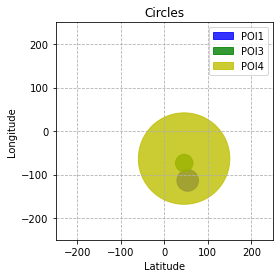

In [14]:
# creating each cricle
circle1 = plt.Circle((df2_cleaned.loc[0][' Latitude'], df2_cleaned.loc[0]['Longitude']), Radius_POI1, alpha = 0.8, color = 'b')
circle3 = plt.Circle((df2_cleaned.loc[2][' Latitude'], df2_cleaned.loc[2]['Longitude']), Radius_POI3, alpha = 0.8, color = 'g')
circle4 = plt.Circle((df2_cleaned.loc[3][' Latitude'], df2_cleaned.loc[3]['Longitude']), Radius_POI4, alpha = 0.8, color='y')
circles = [circle1, circle3, circle4]

# plotting the circles
fig, ax = plt.subplots()
plt.xlim(-250,250)
plt.ylim(-250,250)
plt.grid(linestyle='--')
ax.set_aspect(1)
ax.add_artist(circle1)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.legend(circles, ['POI1', 'POI3', 'POI4'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Circles')
plt.show()




### 4a. Model

To visualize the popularity of each POI, map them to a scale that ranges from -10 to 10. Please provide a mathematical model to implement this, taking into consideration of extreme cases and outliers. Aim to be more sensitive around the average and give as much visual differentiability as possible.




The popularity of each POI can be describe by their densities, where the radius is divided into 20 to form intervals as follows: $[0, radius/20]$ has rating of 10, $[radius/20, 2*radius/20]$ has rating of 9, ..., $[19*radius/20, 20*radius/20]$ has rating of -10. Finally, the mean popularty rating for all requests is popularity rating of the POI.

In [15]:
def Popularity(df, radius, diff):
    interval_len = radius/21
    intervals = []
    
    for i in range(0,22):
        val = i * interval_len
        intervals.append(val)
        
    rate = 10
    dict_rate = {}           #In this dictionary rates from -10 to 10 are keys and the intervals are their corresponding values.
    for i in range(21):        
        inter = [intervals[i], intervals[i+1], 0]  #Third element in the value list corresponds to the number of requests in that interval.
        dict_rate.update({rate: inter})
        rate -= 1
        
    interval_lst = dict_rate.values()
    total = 0
    n = len(diff)           #Total number of requests
     
    for d in diff:         
        if d == radius:     #rating points with the distance equvalent with radius of the circle
            total += -10
        else:
            for val in interval_lst:    #rating all points in the circle
                intr1 = val[0]
                intr2 = val[1]
                
                if (d >= intr1) and (d < intr2):
                    key = list(dict_rate.keys())[list(dict_rate.values()).index(val)]
                    total += key
                    val[2] += 1     #updating total number of requests in that interval
                    
    final_rate = round(total/float(n))   #Final POI rating by averaging over all ratings
                    
    for i in range(-10,11):          #Keeping only the number of requests in the dictionary
        val = dict_rate[i]
        dict_rate.update({i : val[2]})
        
    
    return [dict_rate, final_rate]


Popularity_POI1 = Popularity(df_POI1, Radius_POI1, POI1_mean_std[2])
Popularity_POI3 = Popularity(df_POI3, Radius_POI3, POI3_mean_std[2])
Popularity_POI4 = Popularity(df_POI4, Radius_POI4, POI4_mean_std[2])

pop_lst = [Popularity_POI1, Popularity_POI3, Popularity_POI4]

j = 0
for item in pop_lst:
    j += 1
    if j == 2:
        j = 3
    print('POI'+str(j)+' has the popularity %.2f'%(item[1]))


POI1 has the popularity 9.00
POI3 has the popularity 6.00
POI4 has the popularity 10.00


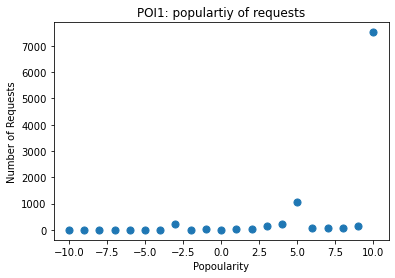

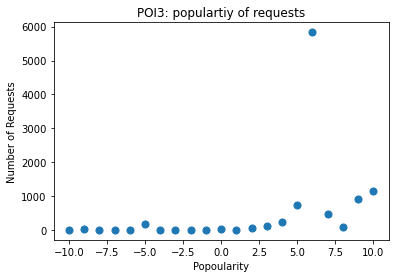

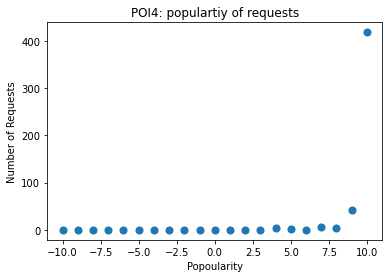

In [17]:
 #visualizing the distribution of ratings vs number of requests
    
def Plot(histdata, name):
    histx = histdata.keys()
    histy = histdata.values()
    plt.scatter(histx,histy, s = 50)
    plt.xlabel("Popoularity")
    plt.ylabel("Number of Requests")
    plt.title(name)
    plt.show()
    

j = 0
for item in pop_lst:
    j += 1
    if j == 2:
        j = 3
    Plot(item[0], 'POI'+str(j)+': populartiy of requests')
        